# Data Analysis on Heart Disease

In [1]:
import numpy as np
import pandas as pd

In [2]:
import os 
for dirname, _,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

sns.set(style="whitegrid")

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [8]:
hrt = pd.read_csv(r"C:\Users\ankus\Desktop\NareshIT\2. Notes\7. EDA\EDA- HEALTHCARE DOMAIN\heart.csv")
hrt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Exploratatory data analysis

In [20]:
hrt.shape

(303, 14)

In [10]:
hrt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
hrt.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
hrt.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
len(hrt.columns)

14

In [15]:
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
hrt.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [22]:
hrt.describe()                #statistic properties

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Univariate analysis

In [23]:
# target variable(0 -- absence of heart disease and 1 -- presence of heart disease)

In [27]:
hrt['target'].nunique()                 # no.of unique value

2

In [29]:
hrt['target'].unique()                   # unique values

array([1, 0])

In [30]:
#frequency distribution of target variable
hrt['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

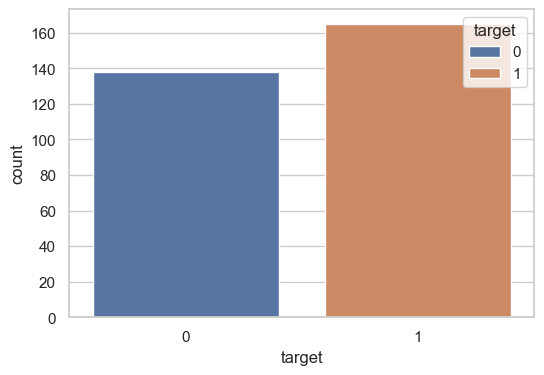

In [34]:
#visualize frequency distribution  of target variable

f, ax =plt.subplots(figsize=(6,4))
ax = sns.countplot(x='target',data=hrt,hue='target')
plt.show()

In [36]:
# frequency distribution  of target variable wrt sex
# 1--male    and  0--female

hrt.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: count, dtype: int64

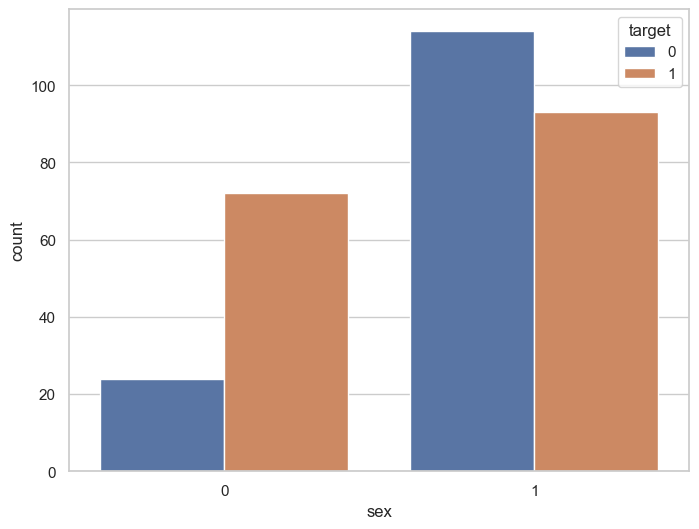

In [37]:
# now visualize

f,ax = plt.subplots(figsize =(8,6))
ax = sns.countplot(x='sex',hue='target',data=hrt)
plt.show()

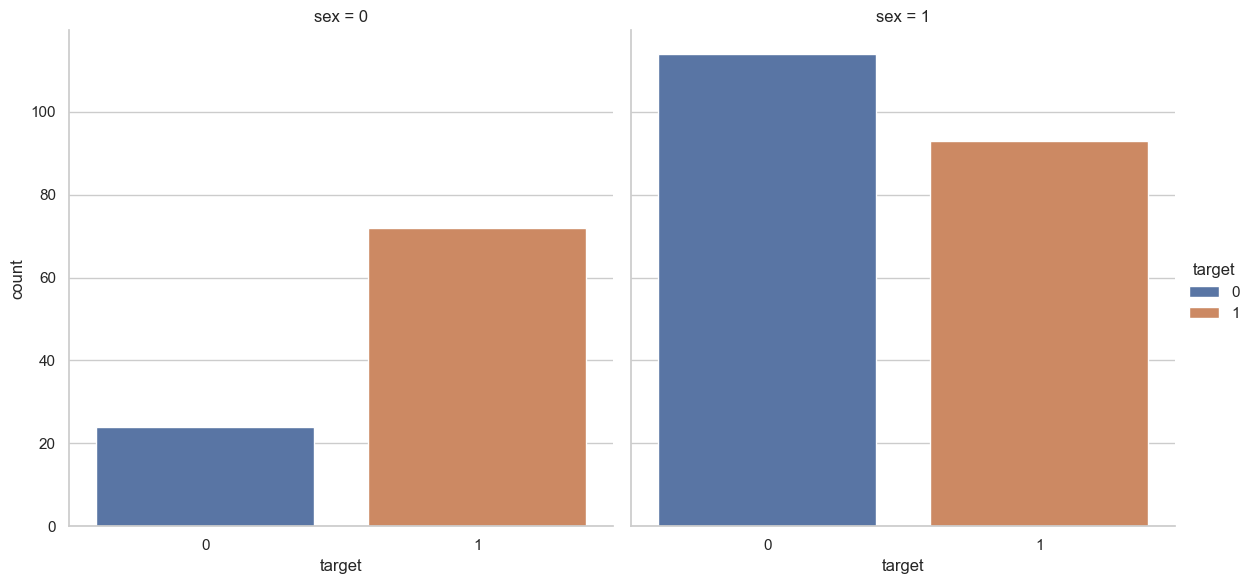

In [44]:
# visualize with catplot

ax= sns.catplot(x='target',col='sex',data=hrt,kind="count",height=6,aspect=1,hue='target')
plt.show()

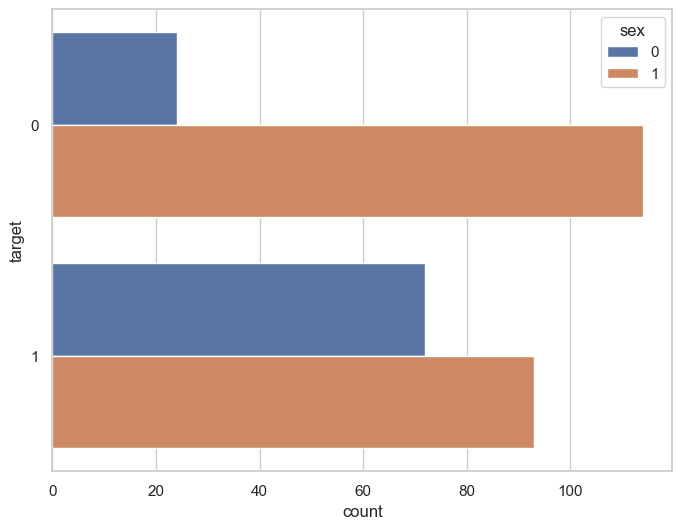

In [47]:
# we can plot bars horizontally

f,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(y='target',data=hrt,hue='sex')
plt.show()

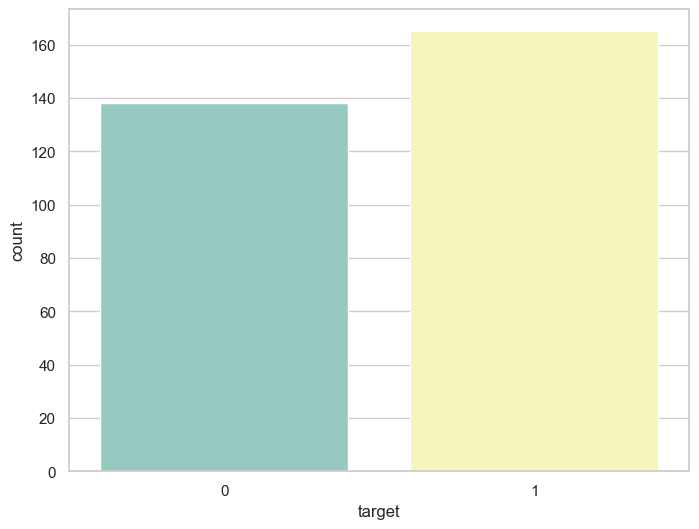

In [55]:
# we can use different colour palette
f,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(data=hrt,x='target',palette="Set3")
plt.show()

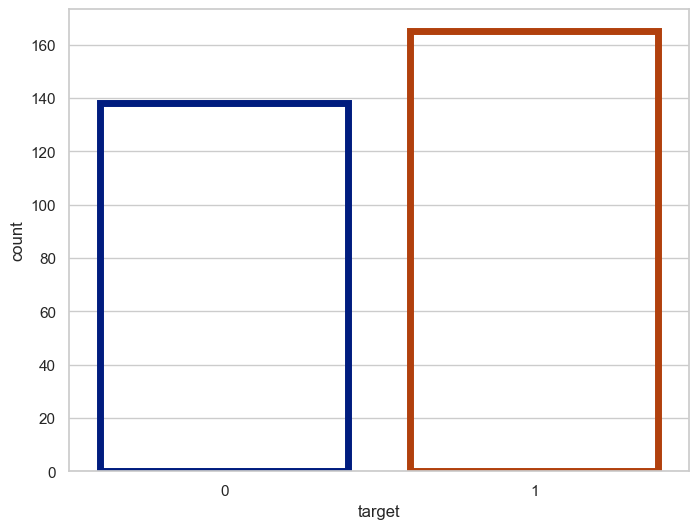

In [61]:
# we can use plt.bar

f,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = "target",data = hrt,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette("dark",3))
plt.show()

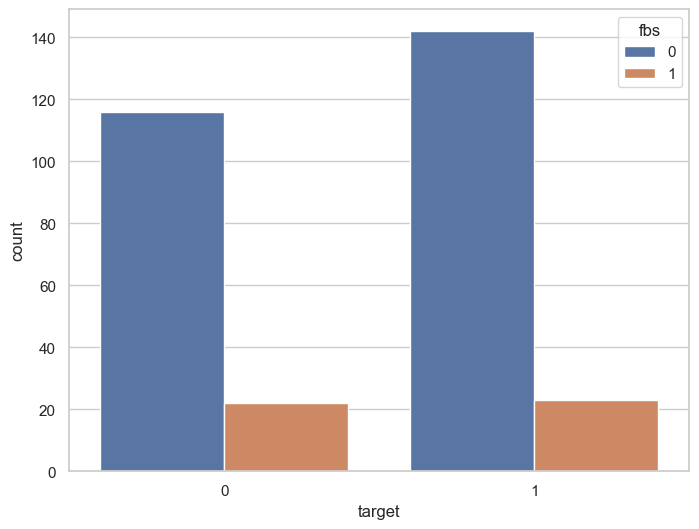

In [62]:
f , ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='target',hue='fbs',data=hrt)
plt.show()

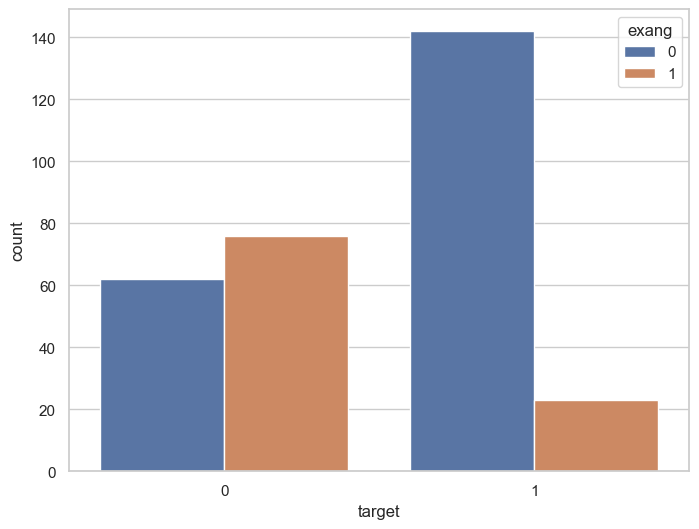

In [63]:
f , ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='target',hue='exang',data=hrt)
plt.show()

# Bivariate Analysis

In [66]:
#correlation(-1 to +1)

correlation = hrt.corr()

In [65]:
correlation['target'].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [67]:
#analyse of target and cp(chest pain)variable

In [68]:
hrt['cp'].nunique()

4

In [70]:
hrt['cp'].unique()          #it can see cp is a categorical data

array([3, 2, 1, 0])

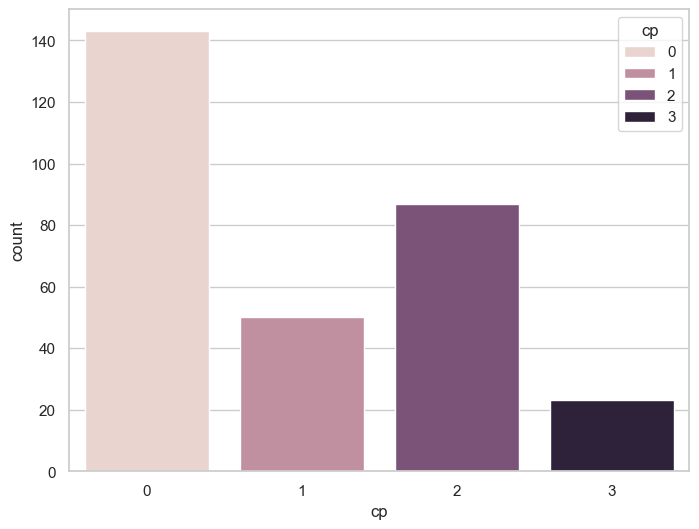

In [73]:
# Visualize the frequency distribution of cp varible

f,ax =plt.subplots(figsize=(8,6))
ax = sns.countplot(data = hrt,x='cp',hue='cp')
plt.show()

In [75]:
# frequency distribution of target wrt cp 

hrt.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: count, dtype: int64

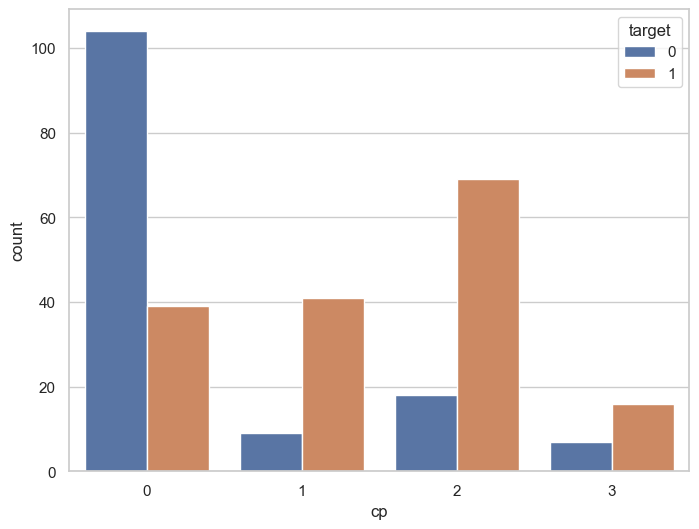

In [76]:
# we can visualize value counts of cp variable wrt target

f,ax=plt.subplots(figsize =(8,6))
ax = sns.countplot(data = hrt,x='cp',hue='target')
plt.show()

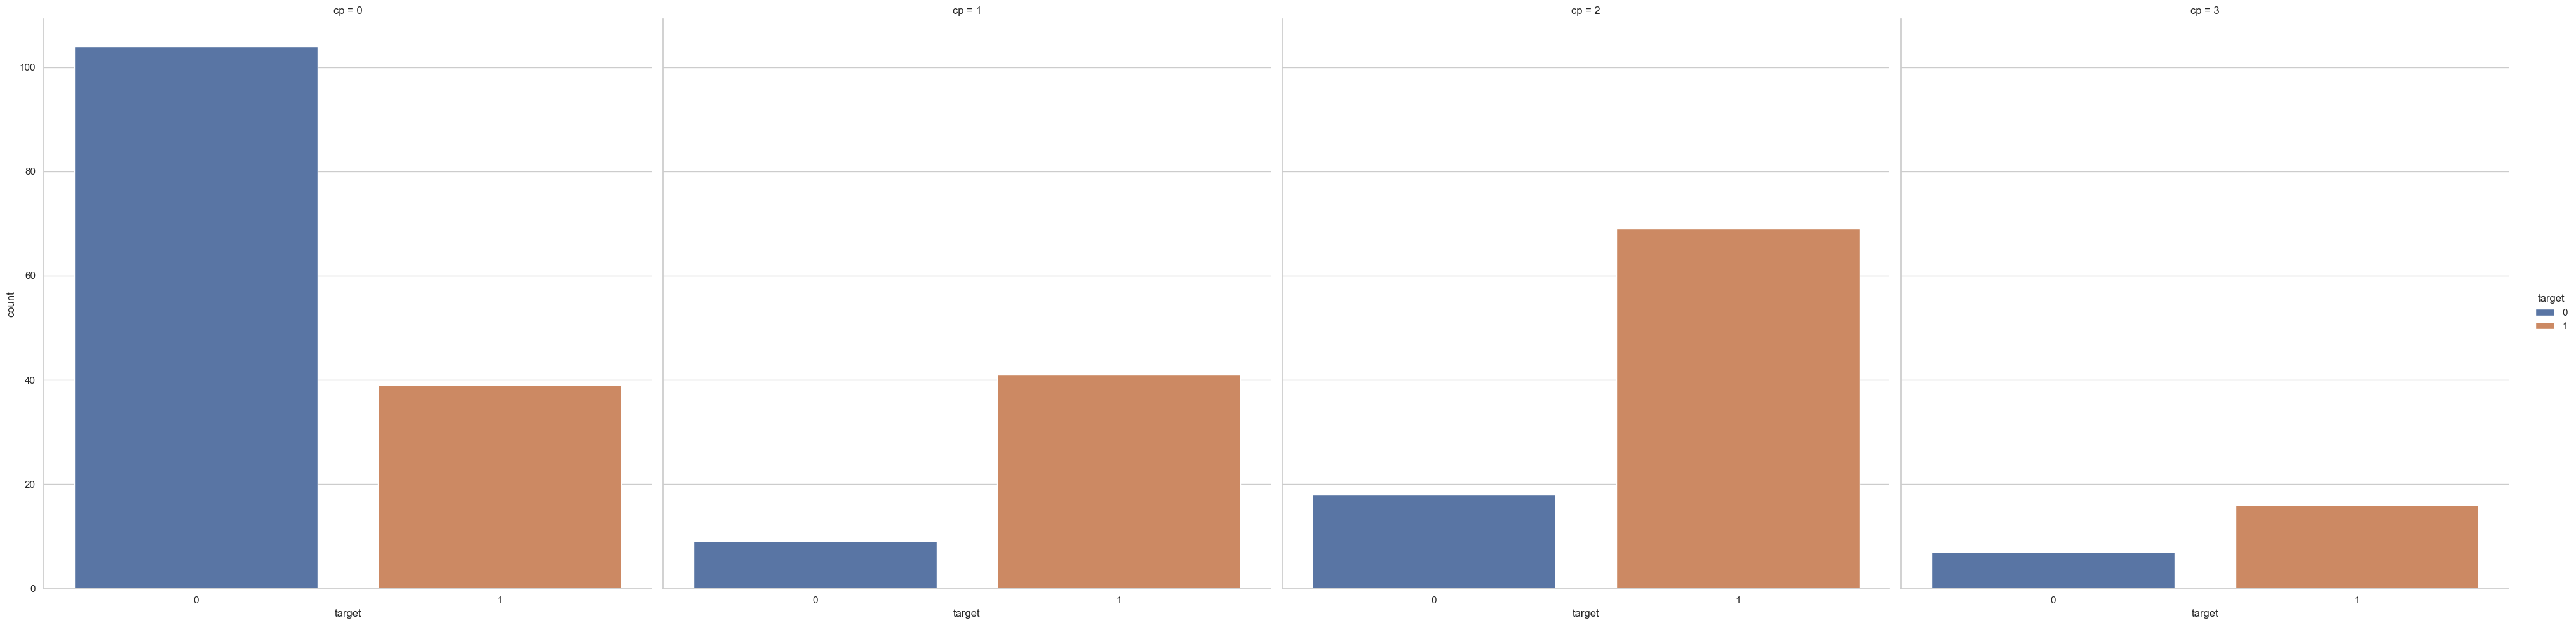

In [84]:
# we can visualize the same information as an alternative

ax = sns.catplot(data=hrt,x='target',col='cp',kind='count',height=10,aspect=1,hue='target')
plt.show()

In [86]:
# thalach -- maximum heeart rate achieve
#Analysis of target and thalach variable

hrt['thalach'].nunique()

91

In [87]:
hrt['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90])

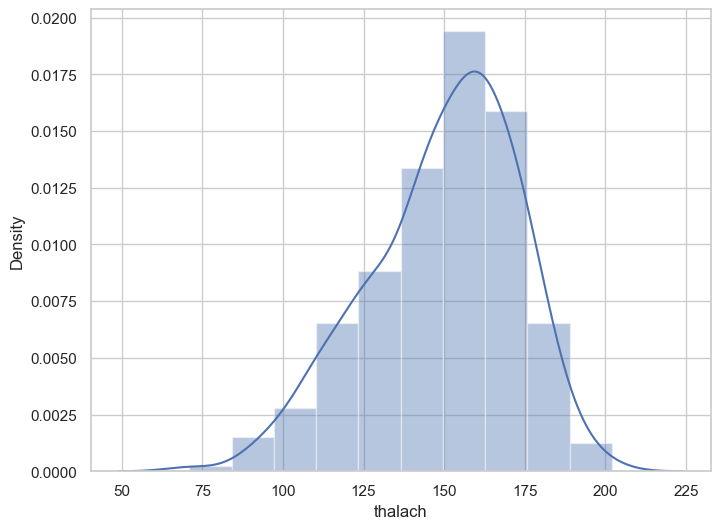

In [92]:
#visualize frequency distribution  of 'thalach' variable

f,ax =plt.subplots(figsize=(8,6))
x=hrt['thalach']
ax = sns.distplot(x,bins=10)
plt.show()                       #looks slightly negative skewed

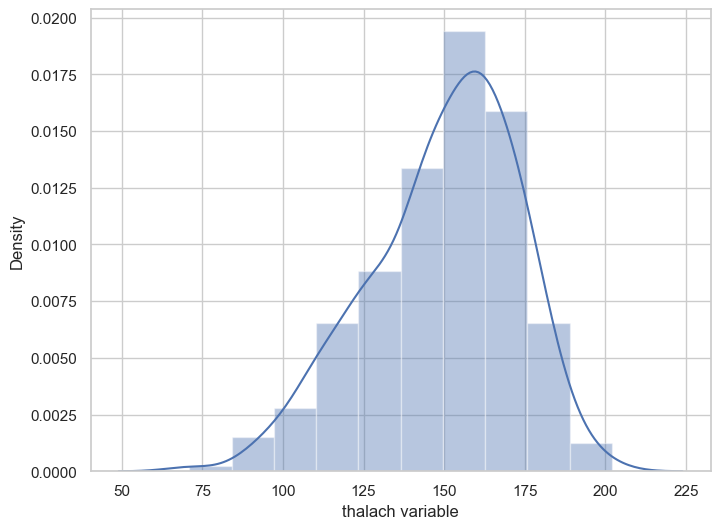

In [95]:
f , ax= plt.subplots(figsize=(8,6))
x= hrt['thalach']
x= pd.Series(x,name='thalach variable')  # pandas series object to get informative axis label
ax = sns.distplot(x,bins=10)
plt.show()

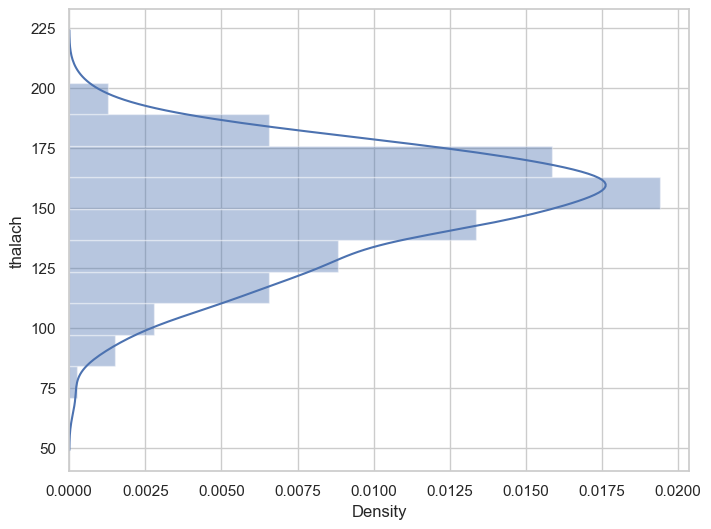

In [96]:
# we can plot the distribution on vertical axis

f,ax=plt.subplots(figsize=(8,6))
x =hrt['thalach']
ax = sns.distplot(x,bins=10,vertical=True)
plt.show()

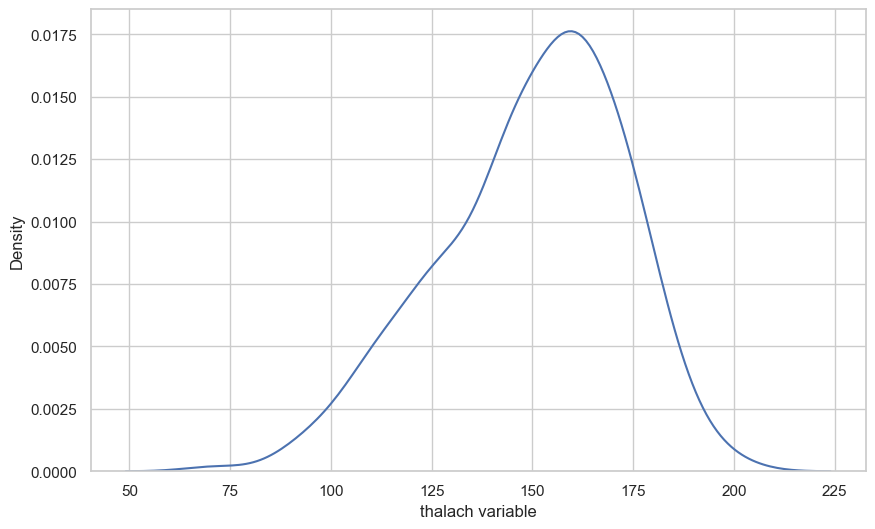

In [97]:
#Seaborn kernel density estimation(KDE) plot

f,ax = plt.subplots(figsize=(10,6))
x=hrt['thalach']
x = pd.Series(x,name='thalach variable')
ax=sns.kdeplot(x)
plt.show()

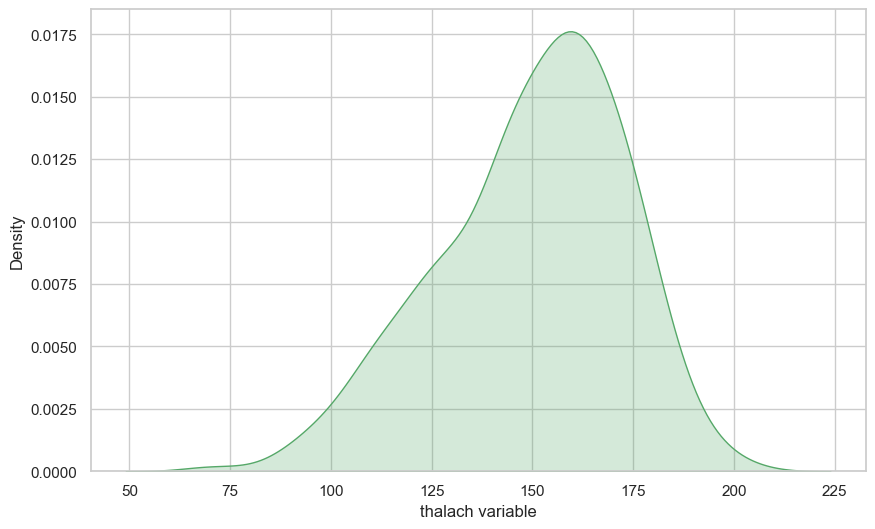

In [100]:
#we can shade under density curve

f,ax = plt.subplots(figsize=(10,6))
x=hrt['thalach']
x = pd.Series(x,name='thalach variable')
ax=sns.kdeplot(x,shade=True,color='g')
plt.show()

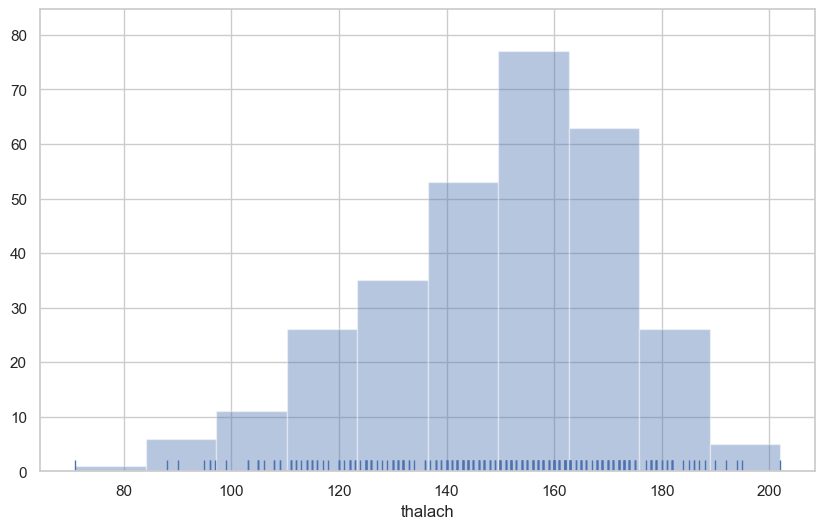

In [103]:
#histogram

f,ax = plt.subplots(figsize=(10,6))
x=hrt['thalach']
ax=sns.distplot(x,kde=False,rug=True,bins=10)
plt.show()

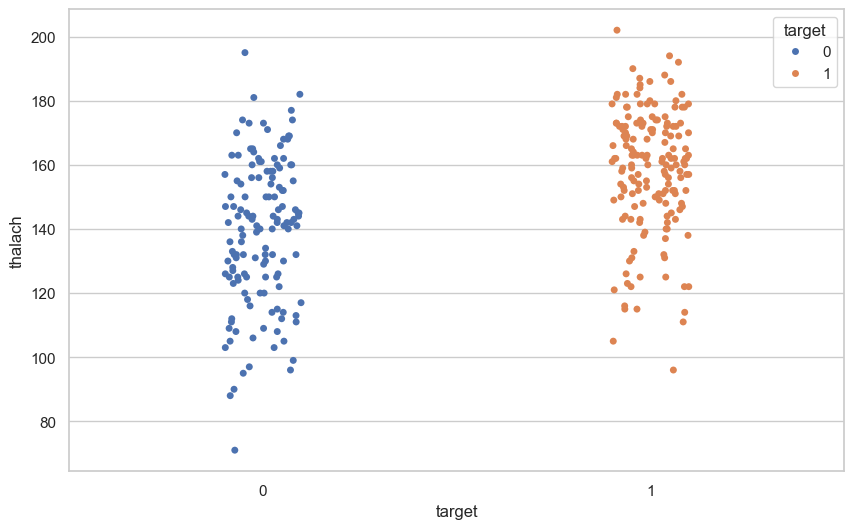

In [107]:
# Visualize frequency distribution of `thalach` variable wrt `target`

f,ax = plt.subplots(figsize=(10,6))
sns.stripplot(x='target',y='thalach',data=hrt,hue='target')
plt.show()

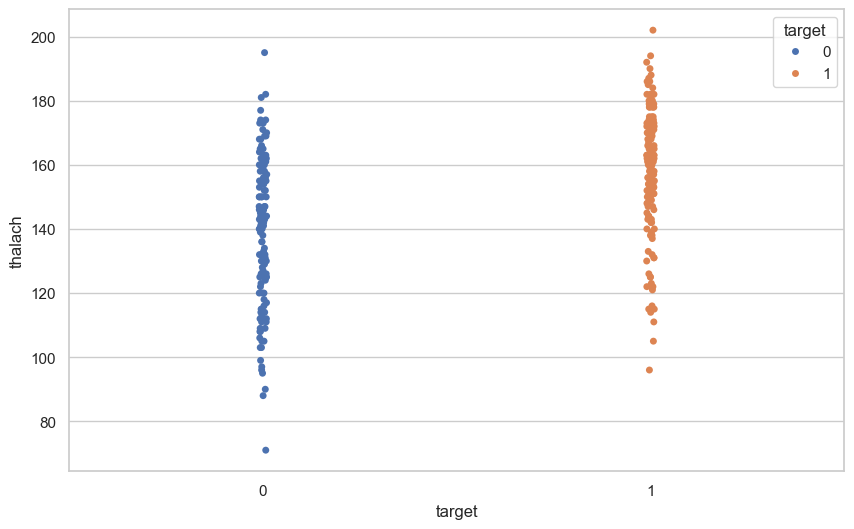

In [108]:
#We can add jitter to bring out the distribution of values

f,ax = plt.subplots(figsize=(10,6))
ax = sns.stripplot(x='target',y='thalach',data=hrt,jitter=0.01,hue='target')
plt.show()

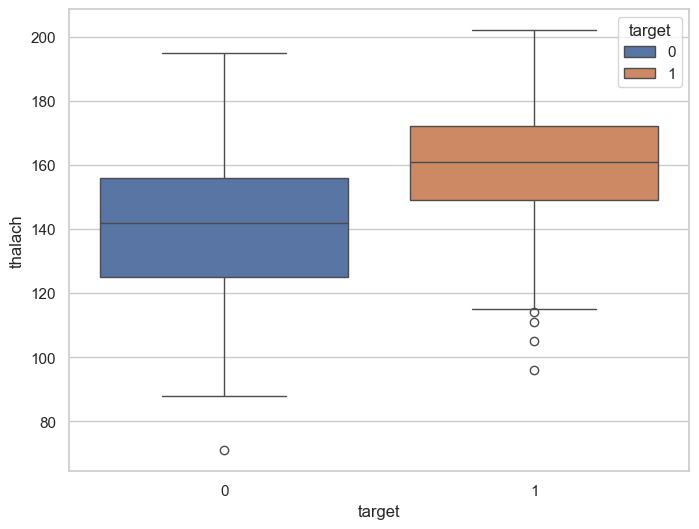

In [109]:
# Visualize distribution of `thalach` variable wrt `target` with boxplot

f,ax = plt.subplots(figsize=(8,6))
x=sns.boxplot(x='target',y='thalach',data=hrt,hue='target')
plt.show()

# Multivariate analysis

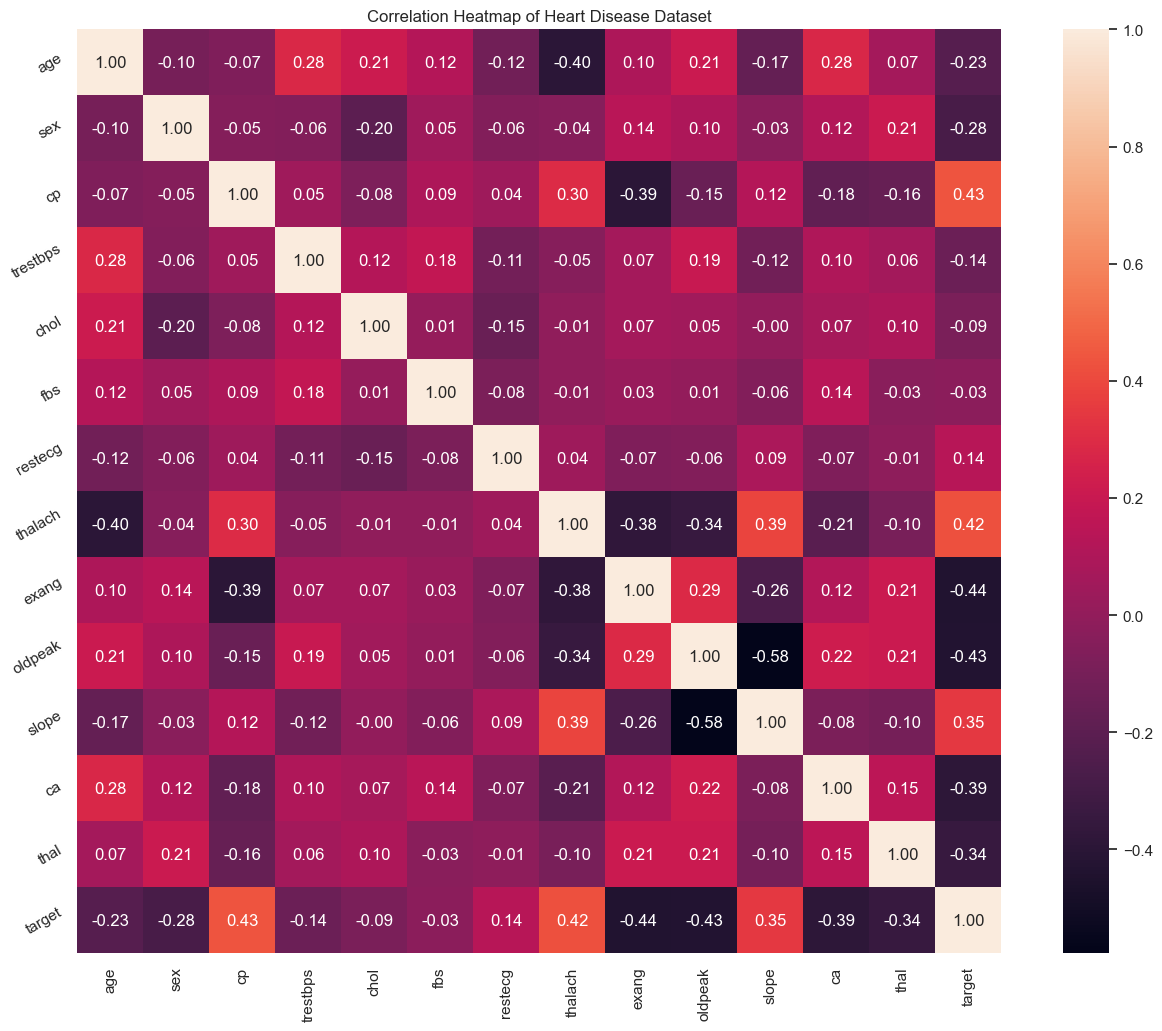

In [110]:
#discovers patrern and relationships
#Heat Map

plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(correlation,square=True,annot=True,fmt='.2f',linecolor='white')
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)
plt.show()

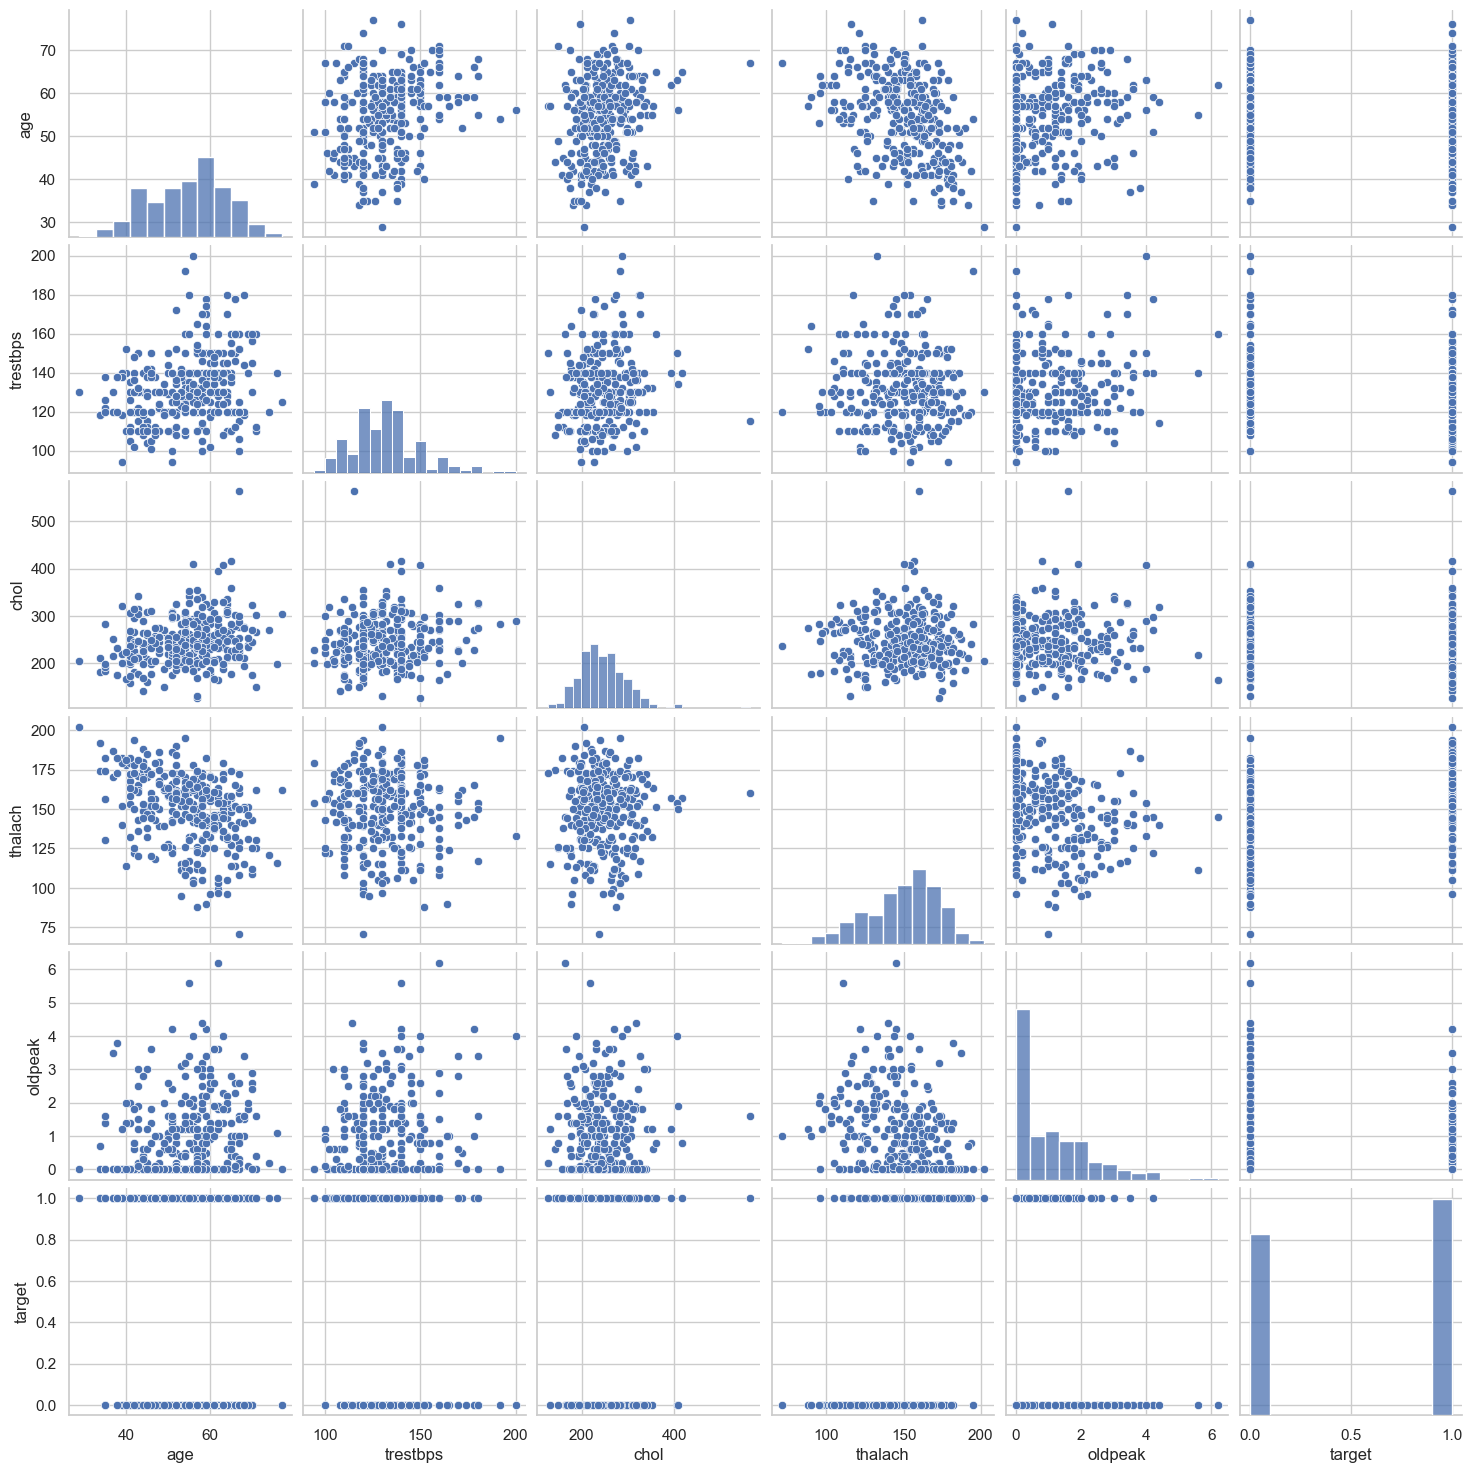

In [111]:
#pair plot

num_var=['age','trestbps','chol','thalach','oldpeak','target']
sns.pairplot(hrt[num_var],kind='scatter',diag_kind='hist')
plt.show()

In [112]:
# Analysis of `age` and other variables

hrt['age'].nunique()

41

In [113]:
hrt['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

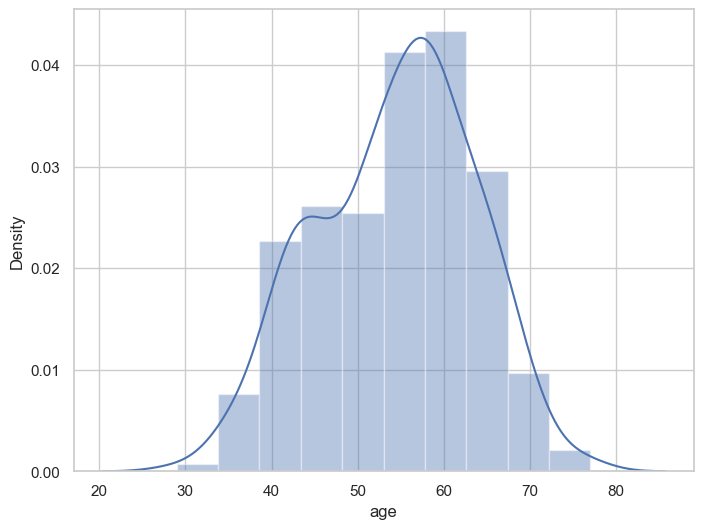

In [117]:
#plot distribution of age variable

f,ax=plt.subplots(figsize=(8,6))
x= hrt['age']
ax=sns.distplot(x,bins=10)
plt.show()

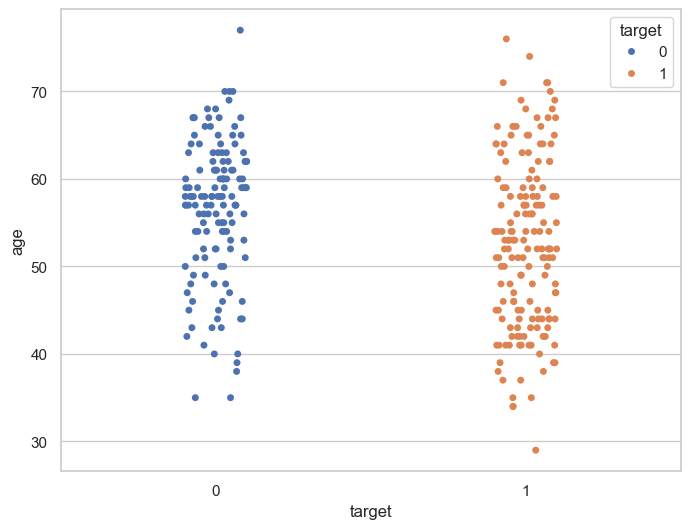

In [122]:
# Analyze `age` and `target` variable

f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="age", data=hrt,hue='target')
plt.show()

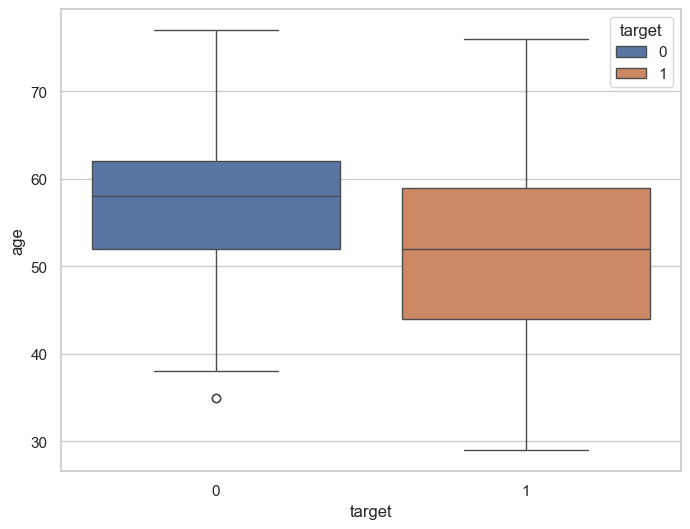

In [126]:
#boxplot

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=hrt,hue='target')
plt.show()

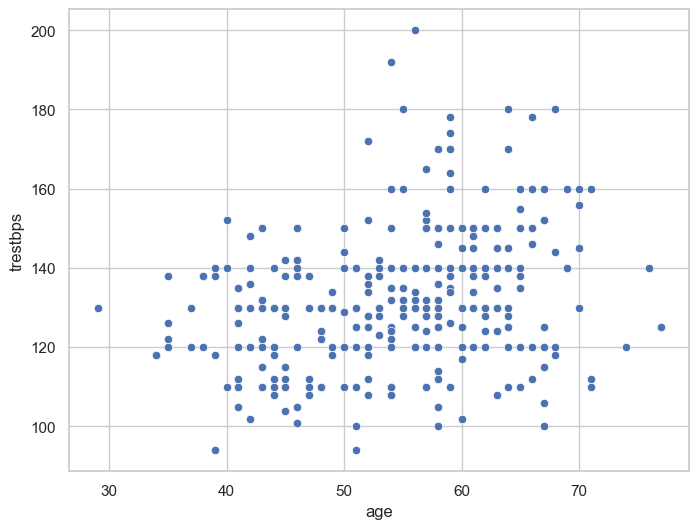

In [128]:
# Analyze `age` and `trestbps` variable

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="trestbps", data=hrt)
plt.show()       # show no ralation between age and trestbps

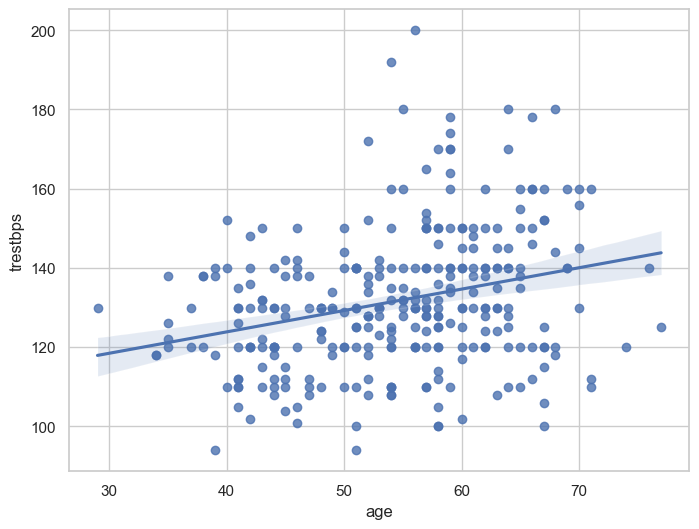

In [129]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="trestbps", data=hrt)
plt.show()

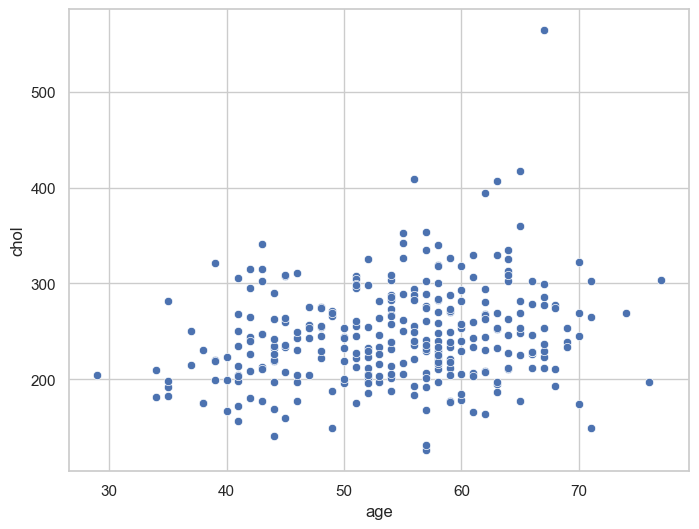

In [130]:
# Analyze `age` and `chol` variable

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="chol", data=hrt)
plt.show()

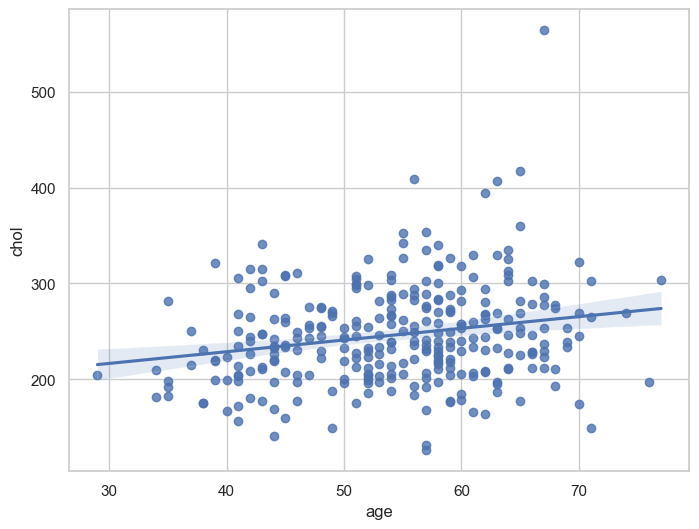

In [131]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="chol", data=hrt)
plt.show()

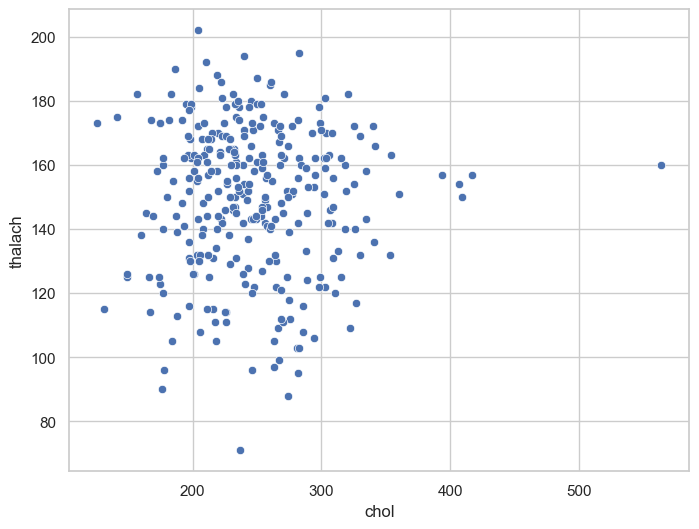

In [132]:
# Analyze `chol` and `thalach` variable

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="chol", y="thalach", data=hrt)
plt.show()

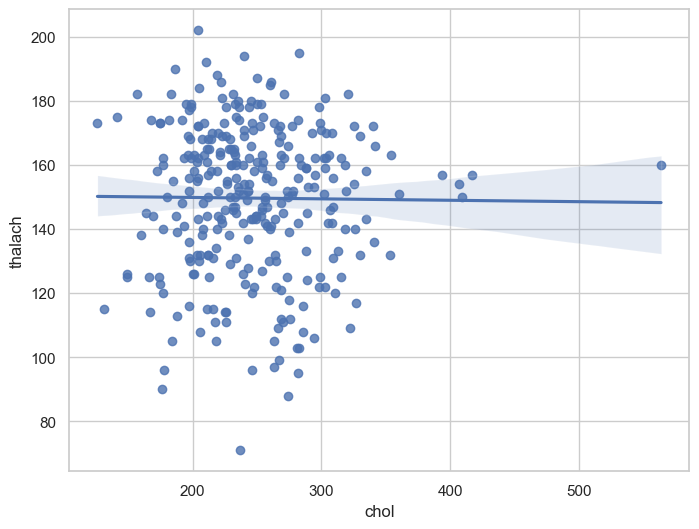

In [133]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="chol", y="thalach", data=hrt)
plt.show()

# Dealing with missing values

In [137]:
hrt.isnull().sum()      # means there is no missing value all 0

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Check with ASSERT statement

In [138]:
#assert that there are no missing values in the dataframe

assert pd.notnull(hrt).all().all()

In [139]:
#assert all values are greater than or equal to 0

assert (hrt >= 0).all().all()


# Outlier detection

In [140]:
hrt['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

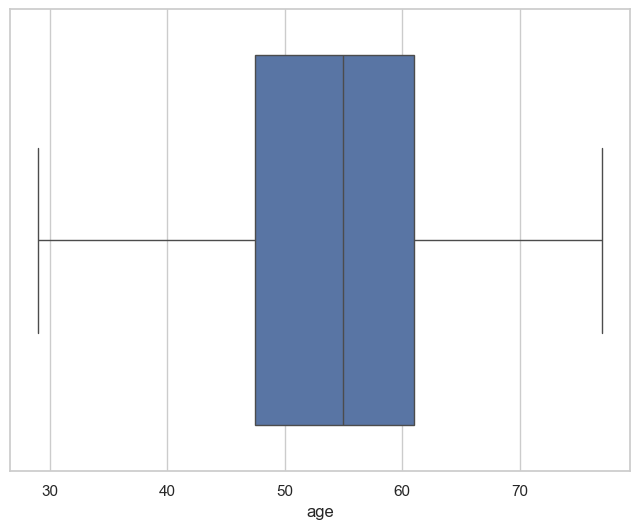

In [141]:
# Box-plot of `age` variable

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=hrt["age"])
plt.show()

In [142]:
# 'trestbps variable

hrt['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

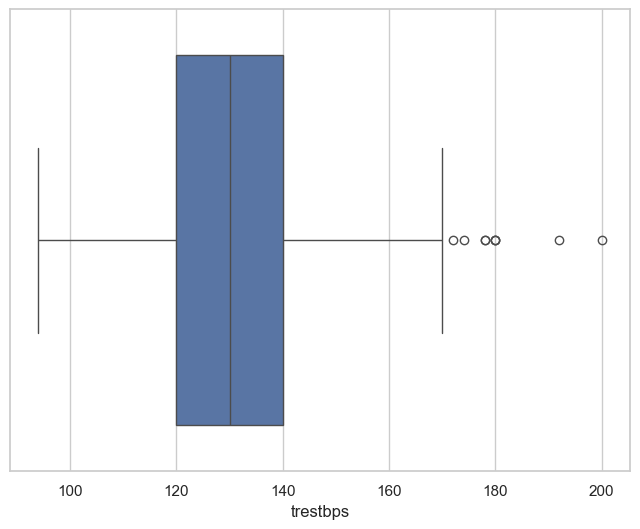

In [143]:
# Box-plot of `trestbps` variable

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=hrt["trestbps"])
plt.show()

In [147]:
# chol variable
hrt['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

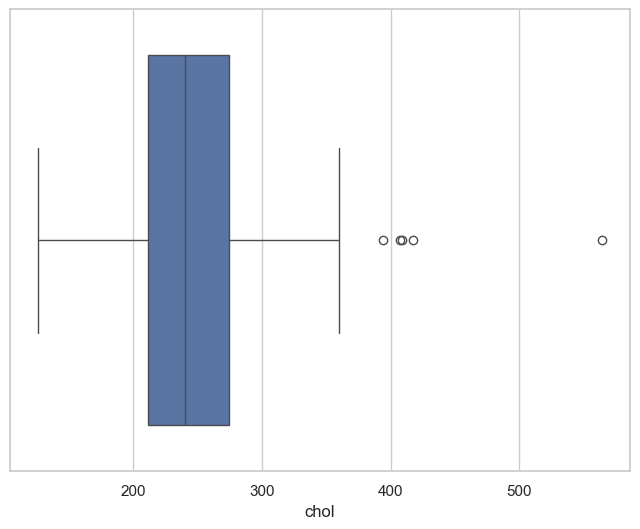

In [148]:
# Box-plot of `chol` variable

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=hrt["chol"])
plt.show()


In [149]:
# thalach varaible

hrt['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

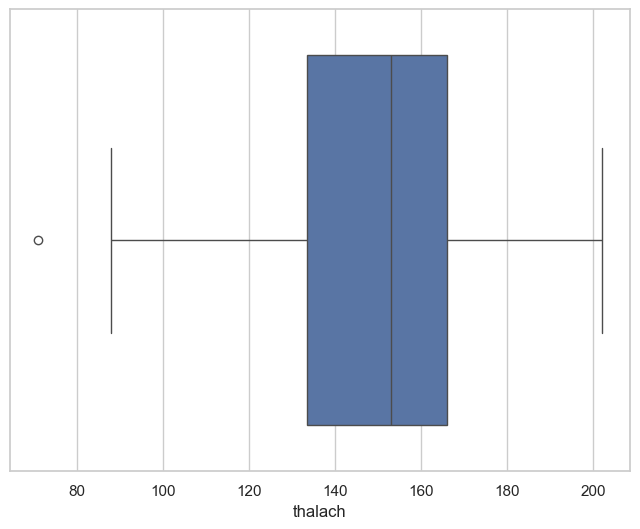

In [152]:
# Box-plot of `thalach` variable

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=hrt["thalach"])
plt.show()

In [153]:
# oldpeak variable

hrt['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

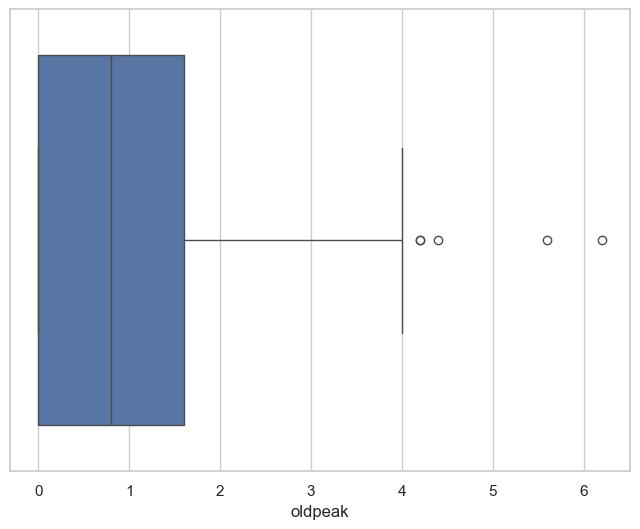

In [154]:
# Boxplot of oldpeak variable

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=hrt["oldpeak"])
plt.show()

In [157]:

 #Findings

#- The `age` variable does not contain any outlier.

#- `trestbps` variable contains outliers to the right side.

#- `chol` variable also contains outliers to the right side.

#- `thalach` variable contains a single outlier to the left side.

#- `oldpeak` variable contains outliers to the right side.

#- Those variables containing outliers needs further investigation.'''
